<a href="https://www.kaggle.com/code/gregoriusbayuaji/hr-analysis-promotion-rate?scriptVersionId=190759719" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# For splitting 
from collections import Counter
from sklearn.model_selection import train_test_split

# For Feature Selection
from mlxtend.feature_selection import SequentialFeatureSelector
from sklearn.feature_selection import RFECV
import category_encoders as ce

# Modeling & Accuracy Metrics
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

# For HyperParameter Tuning
from sklearn.model_selection import RandomizedSearchCV

import warnings
warnings.filterwarnings('ignore')

# Introduction

Human Resources (HR) is a precious and strategic asset to determine whether the company is healthy or not it looks from the assets. Human Resources Development should be planned and continued if it is the company's need in the future. One of the most important processes that often happens at the company is a promotion for employees. With the promotion, employees will work well and be responsible

# Problem

Problems arise when increasingly fierce employee competition actually makes it difficult for the company to determine whether employees who have been promoted for promotion are worthy or not, because sometimes the parties concerned to promote employees and HRD do not follow existing procedures. 

On the other hand, the company also has data about piling up employee promotions, but the company is still not able to manage this data optimally. Even the company itself has not realized that the pile of data can be used as useful information. 

Now companies can no longer process their data manually, given the large number of employees and the rapid development of technology. For analysis to be more effective, HRD needs systematic assistance to process and store data.

# Goals


1) Knowing what criteria affect the promotion of employees

2) Creating a model that can predict which employees that should be promoted

# Data Collecting

In [2]:
train = pd.read_csv('../input/hranalysis/train.csv')
test = pd.read_csv('../input/hranalysis/test.csv')

In [3]:
train.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


In [4]:
test.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
0,8724,Technology,region_26,Bachelor's,m,sourcing,1,24,NaN,1,1,0,77
1,74430,HR,region_4,Bachelor's,f,other,1,31,3.0,5,0,0,51
2,72255,Sales & Marketing,region_13,Bachelor's,m,other,1,31,1.0,4,0,0,47
3,38562,Procurement,region_2,Bachelor's,f,other,3,31,2.0,9,0,0,65
4,64486,Finance,region_29,Bachelor's,m,sourcing,1,30,4.0,7,0,0,61


In [5]:
print("Train Data size (rows, collums):", train.shape)
print("Test Data Size (rows, collums):", test.shape)

Train Data size (rows, collums): (54808, 14)
Test Data Size (rows, collums): (23490, 13)


# Data Describing

According to the info, we find out that the variables of the data are:
- employee_id: Employee's unique ID
- department: Employee's department
- region: Employee's region (Not in order)
- education: Employee's education level
- gender: Employee's Gender
- recruitment_channel: Employee's Recruitment Channel
- no_of_trainings: Number of employee's technical, soft skill, and other skill  training
- age: Employee's Age
- previous_year_rating: Employee's previous year rating (score)
- length_of_service: Employee's length of service (year)
- KPIs_met >80%: Does the employee meet the KPI criteria above 80%?
- awards_won?: Does the employee won the awards last yar?
- avg_training_score: Average employee's training evaluation score
- is_promoted: Is the employee worth to be promoted?

Gender variables have abbrevation as follows:
- f: female
- m: male

Variables' of "KPIs_meet >80%", "awards_won?", and "is_promoted" are as follows:
1. No
2. Yes

In [6]:
print('TRAIN DATA')
train.info()
print('')
print('-------------------------------------------------')
print('')
print('TEST DATA')
test.info()

TRAIN DATA
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           54808 non-null  int64  
 1   department            54808 non-null  object 
 2   region                54808 non-null  object 
 3   education             52399 non-null  object 
 4   gender                54808 non-null  object 
 5   recruitment_channel   54808 non-null  object 
 6   no_of_trainings       54808 non-null  int64  
 7   age                   54808 non-null  int64  
 8   previous_year_rating  50684 non-null  float64
 9   length_of_service     54808 non-null  int64  
 10  KPIs_met >80%         54808 non-null  int64  
 11  awards_won?           54808 non-null  int64  
 12  avg_training_score    54808 non-null  int64  
 13  is_promoted           54808 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.9+ MB

-

From the data above, we can see that there are some missing values at the test and train data

### Check the Data Duplication

In [7]:
dupl1 = train[train.duplicated()]
print('Train Data Duplicate Number')
res1 = dupl1.shape
print(res1)
print('---------------------------')
dupl2 = test[test.duplicated()]
print('Test Data Duplicate Number')
dupl2.shape

Train Data Duplicate Number
(0, 14)
---------------------------
Test Data Duplicate Number


(0, 13)

The result shows that here are no duplicate rows inside dataframe

# Dropping null values

## 1. From Train set

In [8]:
train.isnull().sum()

employee_id                0
department                 0
region                     0
education               2409
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    4124
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
is_promoted                0
dtype: int64

In [9]:
train[(train['length_of_service'] == 1)]['previous_year_rating']

10      NaN
23      NaN
29      NaN
56      NaN
58      NaN
         ..
54703   NaN
54734   NaN
54746   NaN
54773   NaN
54801   NaN
Name: previous_year_rating, Length: 4547, dtype: float64

In [10]:
train['previous_year_rating'].fillna(0, inplace = True)
train['previous_year_rating'].isnull().sum()

0

We fill the null 'previous_year_rating' with 0 because we can see that all of the null data has 'length_of_service' with 1, so we can argue that the employees are the new employee, haven't there for a year yet.

In [11]:
train=train.dropna()
train.shape

(52399, 14)

In [12]:
train.isnull().sum()

employee_id             0
department              0
region                  0
education               0
gender                  0
recruitment_channel     0
no_of_trainings         0
age                     0
previous_year_rating    0
length_of_service       0
KPIs_met >80%           0
awards_won?             0
avg_training_score      0
is_promoted             0
dtype: int64

## 2. From Test Set

In [13]:
test.isnull().sum()

employee_id                0
department                 0
region                     0
education               1034
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    1812
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
dtype: int64

In [14]:
test[(test['length_of_service']==1)]['previous_year_rating']

0        NaN
21       NaN
32       NaN
39       NaN
47       NaN
        ... 
23445    NaN
23469    1.0
23479    NaN
23485    3.0
23488    NaN
Name: previous_year_rating, Length: 1992, dtype: float64

In [15]:
test['previous_year_rating'].fillna(0, inplace = True)
test['previous_year_rating'].isnull().sum()

0

In [16]:
#Dropping records with education=NULL
test=test.dropna()
test.shape

(22456, 13)

# EDA Data Visualization

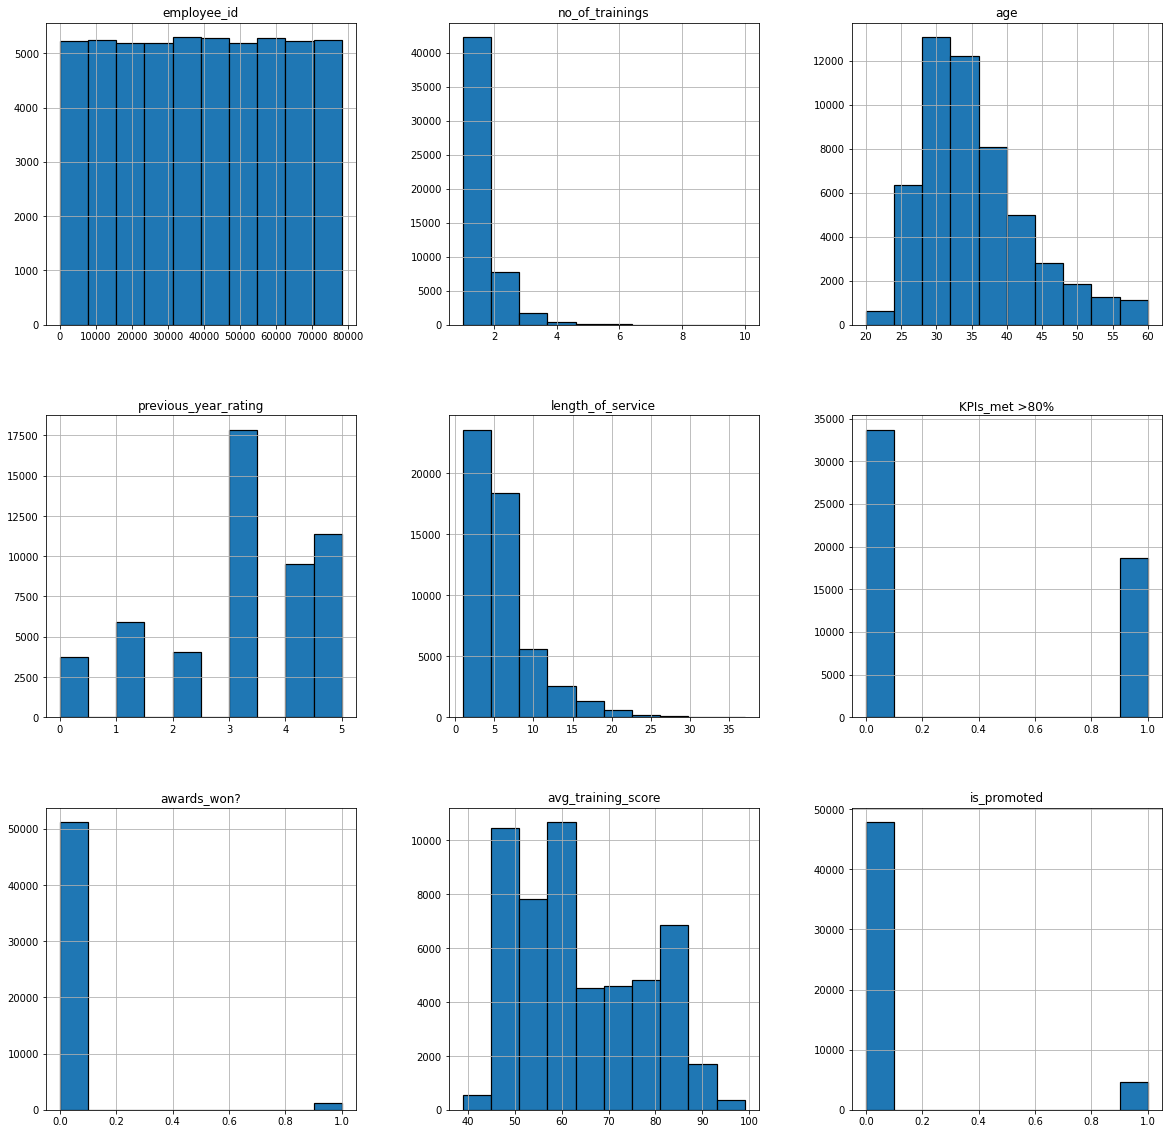

In [17]:
train.hist(edgecolor='black',linewidth=1.2, figsize=(20,20));

## 1. Based on Department

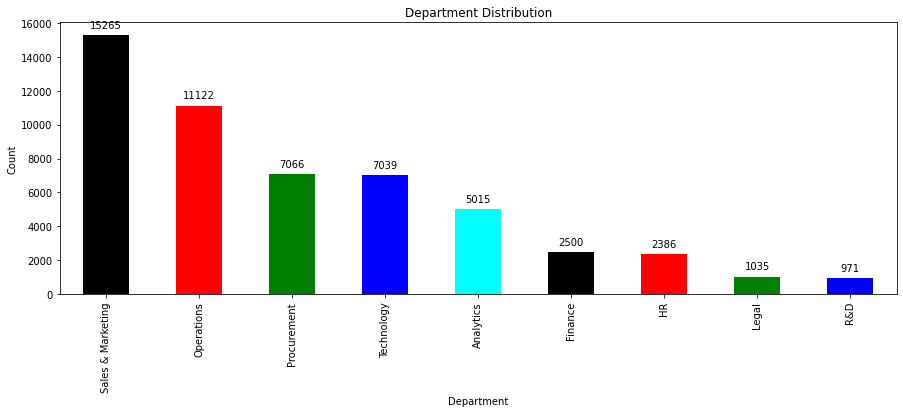

In [18]:
# Plotting the bar chart
plt.figure(figsize=(15, 5))
bar_plot = train['department'].value_counts(dropna=False).plot.bar(color=['black', 'red', 'green', 'blue', 'cyan'])

# Annotating each bar with the count
for p in bar_plot.patches:
    bar_plot.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                      ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.title('Department Distribution')
plt.xlabel('Department')
plt.ylabel('Count')
plt.show()

In [19]:
a = train.groupby(['department','is_promoted'])['is_promoted'].count().unstack().fillna(0)
a['%']=((a[1]/(a[0] + a[1]))*100).round(2) #calculation of promotion %
a

is_promoted,0,1,%
department,,,
Analytics,4529,486,9.69
Finance,2294,206,8.24
HR,2251,135,5.66
Legal,982,53,5.12
Operations,10106,1016,9.14
Procurement,6379,687,9.72
R&D,904,67,6.90
Sales & Marketing,14129,1136,7.44
Technology,6279,760,10.80


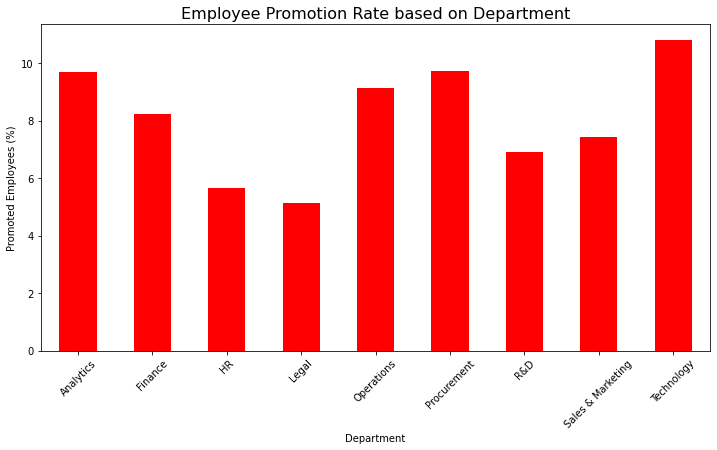

In [20]:
plt.figure(figsize=(12,6))
a['%'].plot.bar(color = 'red')
a = a.sort_values('%',ascending=False)
plt.title('Employee Promotion Rate based on Department', size = 16)
plt.xlabel('Department')
plt.xticks(rotation = 45)
plt.ylabel('Promoted Employees (%)')
plt.show()

## 2. Based on Region

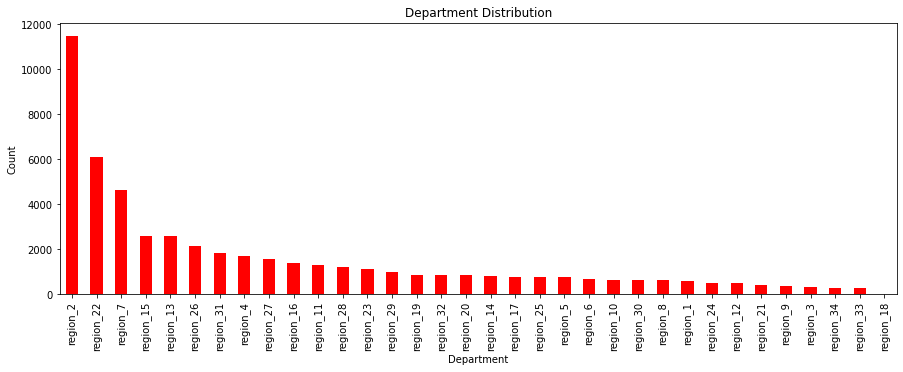

In [21]:
# Plotting the bar chart
plt.figure(figsize=(15, 5))
bar_plot = train['region'].value_counts(dropna=False).plot.bar(color=['red'])

plt.title('Department Distribution')
plt.xlabel('Department')
plt.ylabel('Count')
plt.show()

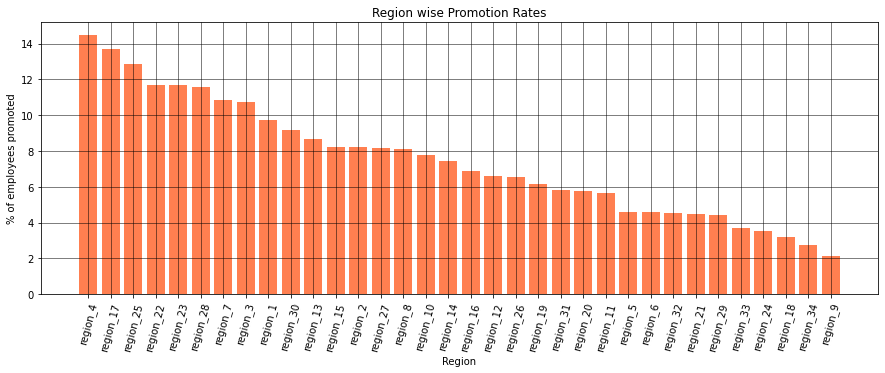

In [22]:
y = train.groupby(['region', 'is_promoted'])['is_promoted'].count().unstack().fillna(0)
y['%'] = (y[1] / (y[0] + y[1])) * 100  # Calculation of promotion %
y = y.sort_values('%', ascending=False)  # Sorting by promotion rate to get insights easily

# Plotting as a bar chart
plt.figure(figsize=(15,5))
plt.bar(y.index, y['%'], color='coral')
plt.grid(color='black', linestyle='-', linewidth=0.5)
plt.title('Region wise Promotion Rates')
plt.xlabel('Region')
plt.xticks(rotation=75)
plt.ylabel('% of employees promoted')
plt.show()

## 3. Based on Education

In [23]:
# check value counts in " department " columns
train['education'].value_counts()

Bachelor's          36669
Master's & above    14925
Below Secondary       805
Name: education, dtype: int64

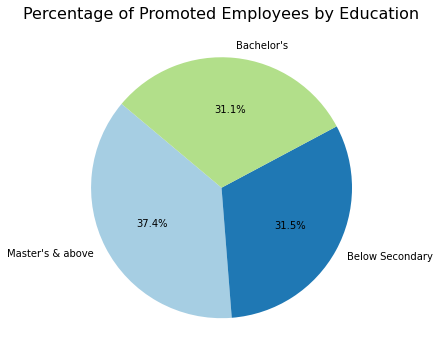

In [24]:
b = train.groupby(['education','is_promoted'])['is_promoted'].count().unstack().fillna(0)
b['%']=b[1]/(b[0] + b[1])*100 #calculation of promotion %
b = b.sort_values('%',ascending=False)
plt.figure(figsize=(12,6))
plt.pie(b['%'], labels=b.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
plt.title('Percentage of Promoted Employees by Education', size=16)
plt.show()

## 4. Based on Gender

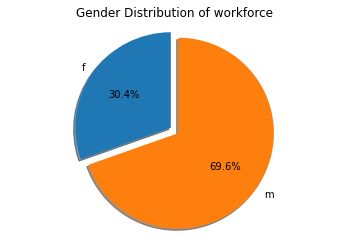

In [25]:
labels = 'f','m'
sizes = list(train.groupby('gender')['gender'].count())
explode=(0.1,0)
fig1, ax1 = plt.subplots()
ax1.pie(sizes,explode=explode,labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  
plt.title("Gender Distribution of workforce")
plt.show()

## 5. Based on Recruitment Channel

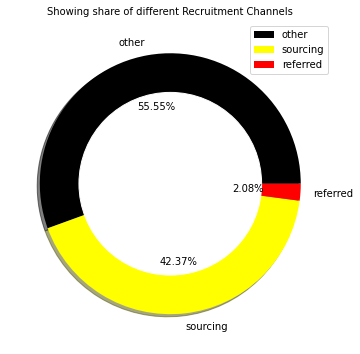

In [26]:
size=[30446,23220,1142]
labels=["other","sourcing","referred"]
color=["black","yellow","red"]

my_circle = plt.Circle((0, 0), 0.7, color = 'white')

plt.rcParams['figure.figsize']=(6,6)
plt.pie(size,labels=labels,colors=color, shadow = True, autopct = '%.2f%%')
plt.title('Showing share of different Recruitment Channels', fontsize = 10)
p = plt.gcf()
p.gca().add_artist(my_circle)
plt.legend()
plt.show()

## 6. Based on Number of Trainings

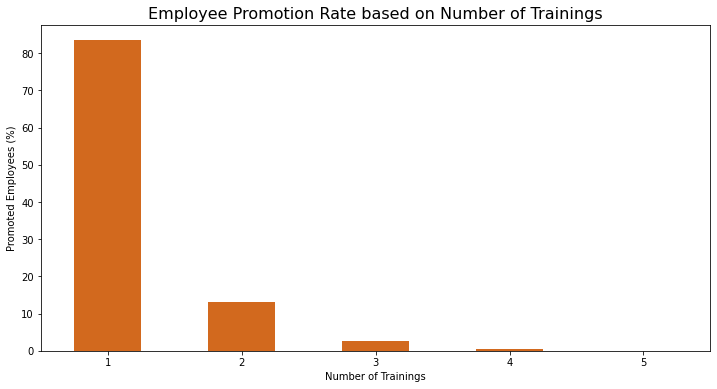

In [27]:
b = train.groupby(['no_of_trainings','is_promoted'])['is_promoted'].count().unstack().fillna(0)
b['%']=(b[1]/(b[1].sum()))*100 #calculation of promotion %
b = b.loc[1:5]
plt.figure(figsize=(12,6))
b['%'].plot.bar(color = 'chocolate')
plt.title('Employee Promotion Rate based on Number of Trainings', size = 16)
plt.xlabel('Number of Trainings')
plt.xticks(rotation = 0)
plt.ylabel('Promoted Employees (%)')
plt.show()

## 7. Based on Age

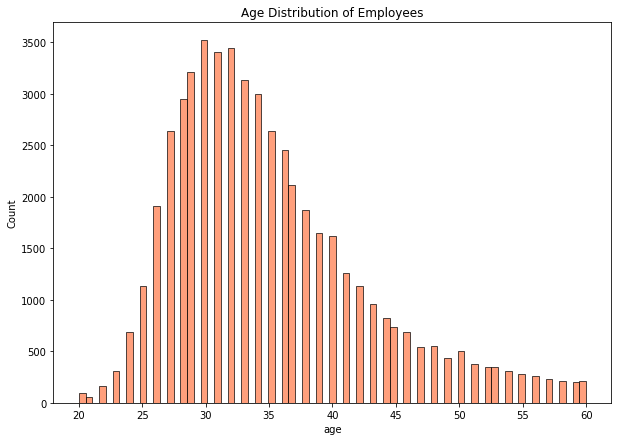

In [28]:
plt.figure(figsize=(10,7))
sns.histplot(train.age,color='coral')
plt.title("Age Distribution of Employees")
plt.show()

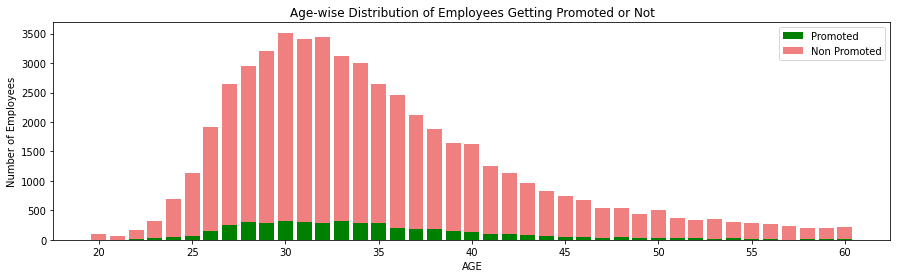

In [29]:
y = train.groupby(['age', 'is_promoted'])['is_promoted'].count().unstack().fillna(0)
y['total'] = y.sum(axis=1)


fig, ax = plt.subplots(figsize=(15, 4))
ax.bar(y.index, y[1], label='Promoted', color='green')
ax.bar(y.index, y[0], bottom=y[1], label='Non Promoted', color='lightcoral')
ax.set_xlabel('AGE')
ax.set_ylabel('Number of Employees')
ax.set_title('Age-wise Distribution of Employees Getting Promoted or Not')
ax.legend()

plt.show()

## 8. Based on Previous Year Rating

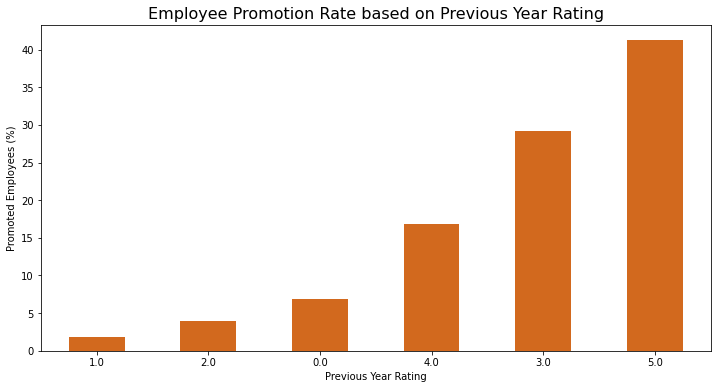

In [30]:
b = train.groupby(['previous_year_rating','is_promoted'])['is_promoted'].count().unstack().fillna(0)
b['%']=(b[1]/(b[1].sum()))*100 #calculation of promotion %
b = b.sort_values('%',ascending=True)
plt.figure(figsize=(12,6))
b['%'].plot.bar(color = 'chocolate')
plt.title('Employee Promotion Rate based on Previous Year Rating', size = 16)
plt.xlabel('Previous Year Rating')
plt.xticks(rotation = 0)
plt.ylabel('Promoted Employees (%)')
plt.show()

## 9. Based on Length of Service

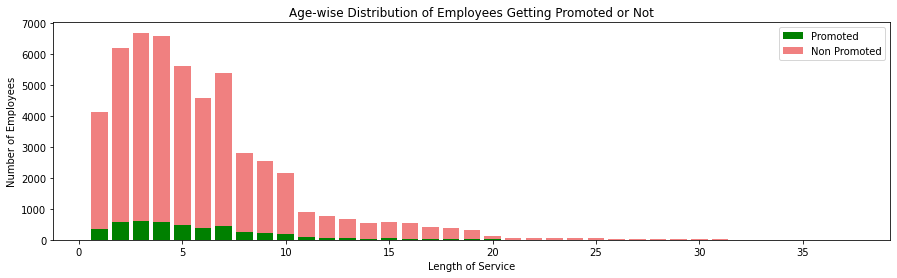

In [31]:
y = train.groupby(['length_of_service', 'is_promoted'])['is_promoted'].count().unstack().fillna(0)
y['total'] = y.sum(axis=1)


fig, ax = plt.subplots(figsize=(15, 4))
ax.bar(y.index, y[1], label='Promoted', color='green')
ax.bar(y.index, y[0], bottom=y[1], label='Non Promoted', color='lightcoral')
ax.set_xlabel('Length of Service')
ax.set_ylabel('Number of Employees')
ax.set_title('Age-wise Distribution of Employees Getting Promoted or Not')
ax.legend()

plt.show()

## 10. Based on KPI's Met > 80

In [32]:
z=train.groupby(['KPIs_met >80%','is_promoted'])['is_promoted'].count().unstack().fillna(0)
z['%']=((z[1]/(z[0]+z[1]))*100).round(2)#calculation of promotion %
z

is_promoted,0,1,%
KPIs_met >80%,,,
0,32333,1370,4.06
1,15520,3176,16.99


Text(0, 0.5, 'Promotion %')

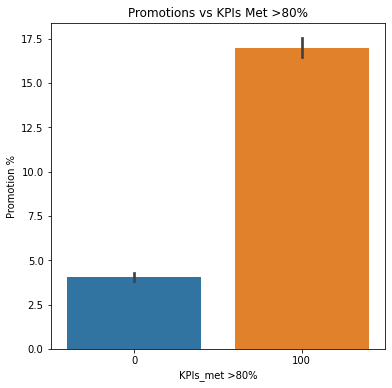

In [33]:
sns.barplot(x=train['KPIs_met >80%'] * 100,y=(train['is_promoted'] * 100))
plt.title("Promotions vs KPIs Met >80%")
plt.ylabel("Promotion %")

## 11. Based on Awards Won

In [34]:
x=train.groupby(['awards_won?','is_promoted'])['is_promoted'].count().unstack().fillna(0)
x['%']=(x[1]/(x[0]+x[1])*100).round(2)
x

is_promoted,0,1,%
awards_won?,,,
0,47178,4007,7.83
1,675,539,44.40


Text(0.5, 0, 'Awards Won ?')

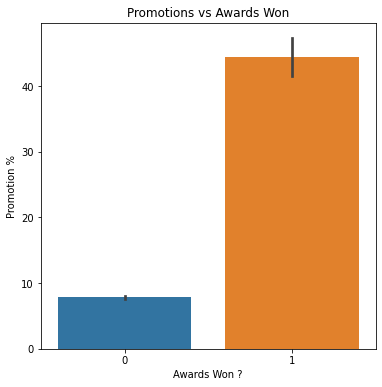

In [35]:
sns.barplot(x=train['awards_won?'],y=(train['is_promoted'] * 100))
plt.title("Promotions vs Awards Won")
plt.ylabel("Promotion %")
plt.xlabel('Awards Won ?')

## 12. Based on Average Training Score

Text(0.5, 1.0, 'Avg Training Score wise Distribution of employees getting promoted or not')

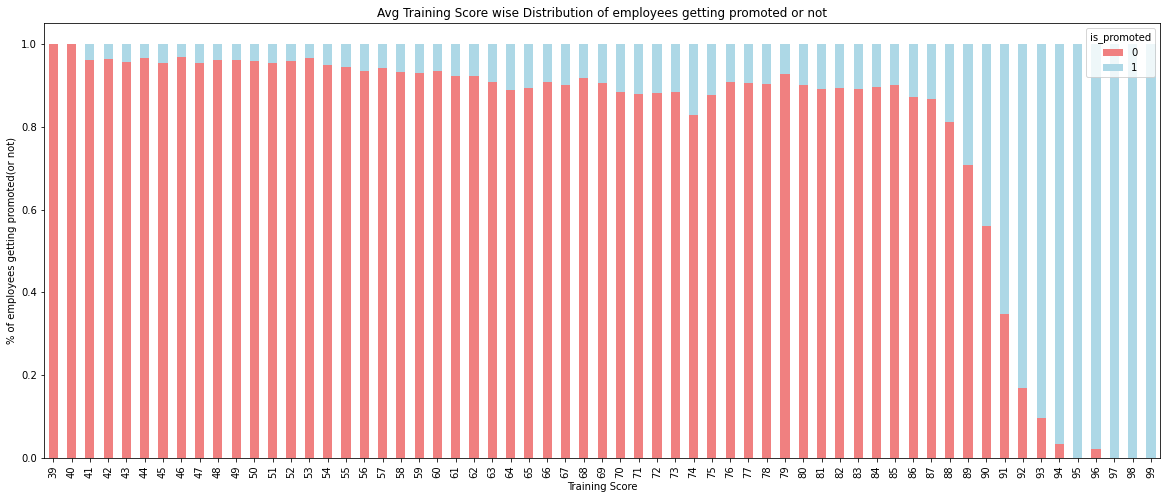

In [36]:
y=train.groupby(['avg_training_score','is_promoted'])['is_promoted'].count().unstack().fillna(0)
y1=y.div(y.sum(1).astype('float'), axis = 0)
y1.plot(kind = 'bar', stacked = True, figsize = (20, 8), color = ['lightcoral', 'lightblue'])
plt.xlabel('Training Score')
plt.ylabel('% of employees getting promoted(or not)')
plt.title("Avg Training Score wise Distribution of employees getting promoted or not")

<AxesSubplot:>

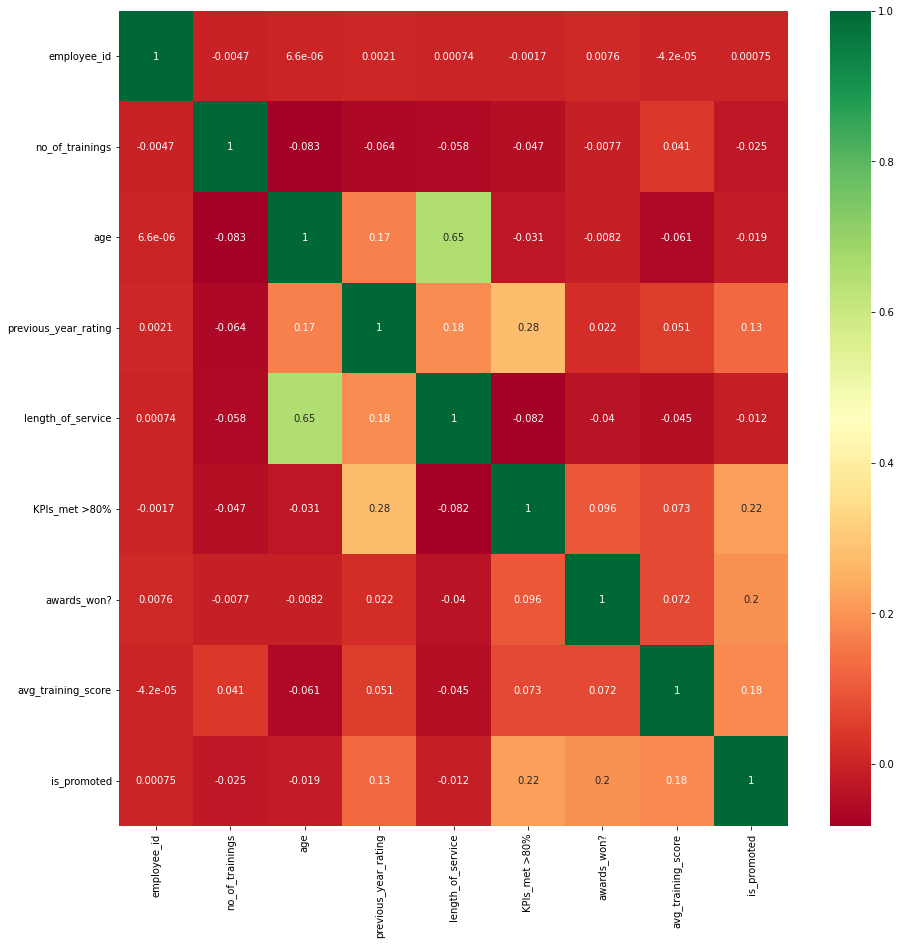

In [37]:
plt.figure(figsize=(15,15))
sns.heatmap(train.corr(),annot=True,cmap="RdYlGn", annot_kws={"size":10})

From the EDA result of each variables and the correlation matrix, we can see that only 4 variables that can effect the employee promotion criteria. Those variables are previous year rating, KPI, awards, and average training score. But even though, if we compared it to other variables, they give effect to the promotion criteria, the effect is only around 20%

# Data Splitting

Data Splitting is used to ensure data that used to train and test the model are based on the same condition, so the result will be same.

In [38]:
#Splitting dataset into train set and validation set
train, val = train_test_split(train, test_size = 0.30, random_state = 1,
                             stratify = train.is_promoted)

In [39]:
print("AFTER SPLITTING \n")
print("Train set shape: \t",train.shape)
print("Validation set shape: \t", val.shape)
print("\nTarget Variable in Original Data:\t", Counter(train.is_promoted))
print("Target Variable in Train Data:   \t",Counter(train.is_promoted))
print("Target Variable in Validation Data:\t", Counter(val.is_promoted))

AFTER SPLITTING 

Train set shape: 	 (36679, 14)
Validation set shape: 	 (15720, 14)

Target Variable in Original Data:	 Counter({0: 33497, 1: 3182})
Target Variable in Train Data:   	 Counter({0: 33497, 1: 3182})
Target Variable in Validation Data:	 Counter({0: 14356, 1: 1364})


In [40]:
#Further splitting Validation set in Val1 and Val2 set for better analysis
val1,val2 = train_test_split(val,test_size = 0.50, random_state = 1,
                             stratify = val.is_promoted)

In [41]:
print("AFTER FURTHER SPLITTING \n")
print("Validation set shape : \t",val.shape)
print("Val1 set shape : \t",val1.shape)
print("Val2 set shape : \t",val2.shape)


print("\nTarget Variable in Validation Data: \t",Counter(val.is_promoted))
print("Target Variable in Val1 Data :  \t",Counter(val1.is_promoted))
print("Target Variable in Val2 Data :  \t",Counter(val2.is_promoted))

AFTER FURTHER SPLITTING 

Validation set shape : 	 (15720, 14)
Val1 set shape : 	 (7860, 14)
Val2 set shape : 	 (7860, 14)

Target Variable in Validation Data: 	 Counter({0: 14356, 1: 1364})
Target Variable in Val1 Data :  	 Counter({0: 7178, 1: 682})
Target Variable in Val2 Data :  	 Counter({0: 7178, 1: 682})


There is no class ratio imbalance after splitting so stratified splitting has worked successfully

In [42]:
x_train = train.drop('is_promoted', axis=1)
y_train = train.is_promoted
print("train: ", train.shape)
print("xtrain: ", x_train.shape)

train:  (36679, 14)
xtrain:  (36679, 13)


In [43]:
x_val1 = val1.drop('is_promoted', axis=1)
y_val1 = val1.is_promoted
print("val1: ", val1.shape)
print("xval1: ", x_val1.shape)
print("yval1: ", y_val1.shape)

val1:  (7860, 14)
xval1:  (7860, 13)
yval1:  (7860,)


In [44]:
x_val2=val2.drop('is_promoted',axis=1)
y_val2 = val2.is_promoted
print("val2 :",val2.shape)
print("xval2 :",x_val2.shape)
print("yval2 :",y_val2.shape)

val2 : (7860, 14)
xval2 : (7860, 13)
yval2 : (7860,)


In [45]:
x_test=test
print("x_test :",x_test.shape)

x_test : (22456, 13)


# Feature Engineering

In [46]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36679 entries, 770 to 31254
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           36679 non-null  int64  
 1   department            36679 non-null  object 
 2   region                36679 non-null  object 
 3   education             36679 non-null  object 
 4   gender                36679 non-null  object 
 5   recruitment_channel   36679 non-null  object 
 6   no_of_trainings       36679 non-null  int64  
 7   age                   36679 non-null  int64  
 8   previous_year_rating  36679 non-null  float64
 9   length_of_service     36679 non-null  int64  
 10  KPIs_met >80%         36679 non-null  int64  
 11  awards_won?           36679 non-null  int64  
 12  avg_training_score    36679 non-null  int64  
 13  is_promoted           36679 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 4.2+ MB


Based on the table above, we can see that there are 5 variables with 'object' data type. They're department, region, education, gender, and recruitment channel.

Based on the variances, we'll do One Hot Encoding for Gender, Education, and Recruitment Channel variable, and do Target Encoding for Department and Region Variable

### 1. Gender

In [47]:
#OneHotEncoding
gender1 = pd.get_dummies(x_train['gender'])
x_train = x_train.join(gender1)
gender2 = pd.get_dummies(x_val1['gender'])
x_val1 = x_val1.join(gender2)
gender3 = pd.get_dummies(x_val2['gender'])
x_val2 = x_val2.join(gender2)
gender4 = pd.get_dummies(x_test['gender'])
x_test = x_test.join(gender4)

In [48]:
x_train.drop(['gender', 'f'], axis = 1, inplace = True)
x_val1.drop(['gender', 'f'], axis = 1, inplace = True)
x_val2.drop(['gender', 'f'], axis = 1, inplace = True)
x_test.drop(['gender', 'f'], axis = 1, inplace = True)

In [49]:
x_train.rename(columns={'m': 'gender (1 = m, 0 = f)'}, inplace = True)
x_val1.rename(columns={'m': 'gender (1 = m, 0 = f)'}, inplace = True)
x_val2.rename(columns={'m': 'gender (1 = m, 0 = f)'}, inplace = True)
x_test.rename(columns={'m': 'gender (1 = m, 0 = f)'}, inplace = True)

In [50]:
x_train.head()

,employee_id,department,region,education,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,"gender (1 = m, 0 = f)"
770,26952,Analytics,region_13,Master's & above,other,1,34,2.0,6,0,0,86,1
5419,68849,Sales & Marketing,region_22,Bachelor's,sourcing,1,36,3.0,5,0,0,47,0
36583,49809,Operations,region_7,Bachelor's,other,1,32,3.0,7,0,0,59,0
51379,8384,HR,region_20,Master's & above,other,1,35,3.0,5,0,0,51,0
23322,35781,HR,region_13,Bachelor's,other,1,39,3.0,11,0,0,49,1


### 2. Education

In [51]:
#OneHotEncoding
edu1=pd.get_dummies(x_train['education'])
x_train=x_train.join(edu1)
edu2=pd.get_dummies(x_val1['education'])
x_val1=x_val1.join(edu2)
edu3=pd.get_dummies(x_val2['education'])
x_val2=x_val2.join(edu3)
edu4=pd.get_dummies(x_test['education'])
x_test=x_test.join(edu4)

In [52]:
x_train.drop('education',axis=1,inplace=True)
x_val1.drop('education',axis=1,inplace=True)
x_val2.drop('education',axis=1,inplace=True)
x_test.drop('education',axis=1,inplace=True)

In [53]:
x_train.head()

,employee_id,department,region,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,"gender (1 = m, 0 = f)",Bachelor's,Below Secondary,Master's & above
770,26952,Analytics,region_13,other,1,34,2.0,6,0,0,86,1,0,0,1
5419,68849,Sales & Marketing,region_22,sourcing,1,36,3.0,5,0,0,47,0,1,0,0
36583,49809,Operations,region_7,other,1,32,3.0,7,0,0,59,0,1,0,0
51379,8384,HR,region_20,other,1,35,3.0,5,0,0,51,0,0,0,1
23322,35781,HR,region_13,other,1,39,3.0,11,0,0,49,1,1,0,0


### 3. Recruitment Channel

In [54]:
#OneHotEncoding
recruit1=pd.get_dummies(x_train['recruitment_channel'])
x_train=x_train.join(recruit1)
recruit2=pd.get_dummies(x_val1['recruitment_channel'])
x_val1=x_val1.join(recruit2)
recruit3=pd.get_dummies(x_val2['recruitment_channel'])
x_val2=x_val2.join(recruit3)
recruit4=pd.get_dummies(x_test['recruitment_channel'])
x_test=x_test.join(recruit4)

In [55]:
x_train.drop('recruitment_channel',axis=1,inplace=True)
x_val1.drop('recruitment_channel',axis=1,inplace=True)
x_val2.drop('recruitment_channel',axis=1,inplace=True)
x_test.drop('recruitment_channel',axis=1,inplace=True)

In [56]:
x_train.head()

,employee_id,department,region,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,"gender (1 = m, 0 = f)",Bachelor's,Below Secondary,Master's & above,other,referred,sourcing
770,26952,Analytics,region_13,1,34,2.0,6,0,0,86,1,0,0,1,1,0,0
5419,68849,Sales & Marketing,region_22,1,36,3.0,5,0,0,47,0,1,0,0,0,0,1
36583,49809,Operations,region_7,1,32,3.0,7,0,0,59,0,1,0,0,1,0,0
51379,8384,HR,region_20,1,35,3.0,5,0,0,51,0,0,0,1,1,0,0
23322,35781,HR,region_13,1,39,3.0,11,0,0,49,1,1,0,0,1,0,0


### 4. Department

In [57]:
#TargetEncoding
x_train['target'] = y_train
target_mapper = x_train.groupby('department')['target'].mean().to_dict()

In [58]:
x_train['dept_enc'] = x_train['department'].map(target_mapper)
x_val1['dept_enc'] = x_val1['department'].map(target_mapper)
x_val2['dept_enc'] = x_val2['department'].map(target_mapper)
x_test['dept_enc'] = x_test['department'].map(target_mapper)

In [59]:
x_train.drop('target',axis=1,inplace=True)

In [60]:
x_train.drop('department',axis=1,inplace=True)
x_val1.drop('department',axis=1,inplace=True)
x_val2.drop('department',axis=1,inplace=True)
x_test.drop('department',axis=1,inplace=True)

In [61]:
x_train.head()

,employee_id,region,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,"gender (1 = m, 0 = f)",Bachelor's,Below Secondary,Master's & above,other,referred,sourcing,dept_enc
770,26952,region_13,1,34,2.0,6,0,0,86,1,0,0,1,1,0,0,0.094779
5419,68849,region_22,1,36,3.0,5,0,0,47,0,1,0,0,0,0,1,0.075091
36583,49809,region_7,1,32,3.0,7,0,0,59,0,1,0,0,1,0,0,0.091683
51379,8384,region_20,1,35,3.0,5,0,0,51,0,0,0,1,1,0,0,0.058752
23322,35781,region_13,1,39,3.0,11,0,0,49,1,1,0,0,1,0,0,0.058752


### 5. Region

In [62]:
#TargetEncoding
x_train['target'] = y_train
train
target_mapper = x_train.groupby('region')['target'].mean().to_dict()

In [63]:
x_train['region_enc'] = x_train['region'].map(target_mapper)
x_val1['region_enc'] = x_val1['region'].map(target_mapper)
x_val2['region_enc'] = x_val2['region'].map(target_mapper)
x_test['region_enc'] = x_test['region'].map(target_mapper)

In [64]:
x_train.drop('target',axis=1,inplace=True)

In [65]:
x_train.drop('region',axis=1,inplace=True)
x_val1.drop('region',axis=1,inplace=True)
x_val2.drop('region',axis=1,inplace=True)
x_test.drop('region',axis=1,inplace=True)

In [66]:
x_train.head()

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,"gender (1 = m, 0 = f)",Bachelor's,Below Secondary,Master's & above,other,referred,sourcing,dept_enc,region_enc
770,26952,1,34,2.0,6,0,0,86,1,0,0,1,1,0,0,0.094779,0.088154
5419,68849,1,36,3.0,5,0,0,47,0,1,0,0,0,0,1,0.075091,0.113043
36583,49809,1,32,3.0,7,0,0,59,0,1,0,0,1,0,0,0.091683,0.114391
51379,8384,1,35,3.0,5,0,0,51,0,0,0,1,1,0,0,0.058752,0.063492
23322,35781,1,39,3.0,11,0,0,49,1,1,0,0,1,0,0,0.058752,0.088154


In [67]:
x_train.drop('employee_id',axis=1,inplace=True)
x_val1.drop('employee_id',axis=1,inplace=True)
x_val2.drop('employee_id',axis=1,inplace=True)
x_test.drop('employee_id',axis=1,inplace=True)

#We Drop employee_id Collumn because it is not an integer column 
#and its values are not needed to make prediction

In [68]:
x_train.head()

,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,"gender (1 = m, 0 = f)",Bachelor's,Below Secondary,Master's & above,other,referred,sourcing,dept_enc,region_enc
770,1,34,2.0,6,0,0,86,1,0,0,1,1,0,0,0.094779,0.088154
5419,1,36,3.0,5,0,0,47,0,1,0,0,0,0,1,0.075091,0.113043
36583,1,32,3.0,7,0,0,59,0,1,0,0,1,0,0,0.091683,0.114391
51379,1,35,3.0,5,0,0,51,0,0,0,1,1,0,0,0.058752,0.063492
23322,1,39,3.0,11,0,0,49,1,1,0,0,1,0,0,0.058752,0.088154


In [69]:
print("train:",x_train.shape)
print("val1:",x_val1.shape)
print("val2:",x_val2.shape)

train: (36679, 16)
val1: (7860, 16)
val2: (7860, 16)


# FEATURE SELECTION

Feature selection is method of reducing the input variable to the model by using the most relevant data and getting rid of noise in data. Function below is designed to calculate and visualize the importance of features

In [70]:
def tree_based_feature_importance(x_train,y_train):
    from sklearn.ensemble import RandomForestClassifier
    # create the random forest model
    model = RandomForestClassifier()

    # fit the model to start training.
    model.fit(x_train, y_train)

    # get the importance of the resulting features.
    importances = model.feature_importances_

    # create a data frame for visualization.
    final_df = pd.DataFrame({"Features": x_train.columns, "Importances":importances})
    final_df.set_index('Importances')

    # sort in descending order 
    final_df = final_df.sort_values('Importances',ascending=False)
    
    #visualising feature importance
    pd.Series(model.feature_importances_, index=x_train.columns).nlargest(6).plot(kind='barh')  
    return final_df

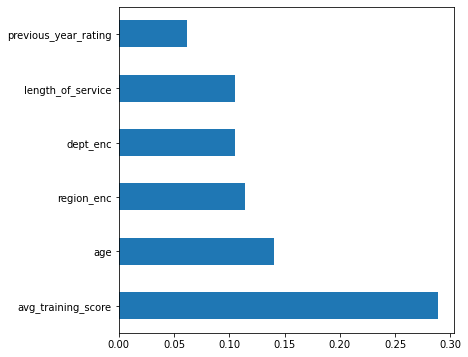

In [71]:
feature_importance = tree_based_feature_importance(x_train,y_train)

In [72]:
display(feature_importance)

,Features,Importances
6,avg_training_score,0.288501
1,age,0.140175
15,region_enc,0.113779
14,dept_enc,0.105278
3,length_of_service,0.105044
2,previous_year_rating,0.062113
4,KPIs_met >80%,0.047612
5,awards_won?,0.032672
7,"gender (1 = m, 0 = f)",0.025820
0,no_of_trainings,0.024706


In [73]:
# Making a list of selected features
selected_features = ['avg_training_score','age', 'region_enc',
                     'length_of_service','previous_year_rating',
                     'KPIs_met >80%', 'dept_enc','awards_won?']
x_train[selected_features].head()

,avg_training_score,age,region_enc,length_of_service,previous_year_rating,KPIs_met >80%,dept_enc,awards_won?
770,86,34,0.088154,6,2.0,0,0.094779,0
5419,47,36,0.113043,5,3.0,0,0.075091,0
36583,59,32,0.114391,7,3.0,0,0.091683,0
51379,51,35,0.063492,5,3.0,0,0.058752,0
23322,49,39,0.088154,11,3.0,0,0.058752,0


In [74]:
#Creating new datasets with just the selected features
x_train_new=x_train[selected_features]
x_val1_new=x_val1[selected_features]
x_val2_new=x_val2[selected_features]
x_test_new=x_test[selected_features]

### Feature Scaling for Better Processing in Models

In [75]:
scaler = MinMaxScaler() # create an instance
x_train_scaled = scaler.fit_transform(x_train_new) #  fit  the scaler to the train set and then transform it
x_val1_scaled = scaler.transform(x_val1_new) # transform (scale) the val1 set
x_val2_scaled = scaler.transform(x_val2_new) # transform (scale) the val2 set
x_test_scaled = scaler.transform(x_test_new) # transform (scale) the test set


x_train_scaled[:5]

array([[0.78333333, 0.35      , 0.61033868, 0.13888889, 0.4       ,
        0.        , 0.80341177, 0.        ],
       [0.13333333, 0.4       , 0.78265985, 0.11111111, 0.6       ,
        0.        , 0.44525002, 0.        ],
       [0.33333333, 0.3       , 0.79199045, 0.16666667, 0.6       ,
        0.        , 0.7470918 , 0.        ],
       [0.2       , 0.375     , 0.43958917, 0.11111111, 0.6       ,
        0.        , 0.14802191, 0.        ],
       [0.16666667, 0.475     , 0.61033868, 0.27777778, 0.6       ,
        0.        , 0.14802191, 0.        ]])

# MODEL TRAINING

## 1. Linear Regression

In [76]:
# Fitting Logistic Regression to the Training Set
classifier = LogisticRegression()
classifier.fit(x_train_scaled, y_train)

# Predicting the Train Set Results
y_pred = classifier.predict(x_train_scaled)

# Classification Report
reptrain=classification_report(y_train, y_pred, output_dict=True)
reptrain = pd.DataFrame(reptrain).transpose()

In [77]:
# Predicting the Val1 Set Results
y_pred = classifier.predict(x_val1_scaled)

# Classification Report
repval1=classification_report(y_val1, y_pred, output_dict=True)
repval1 = pd.DataFrame(repval1).transpose()

# Predicting the Val2 Set Results
y_pred = classifier.predict(x_val2_scaled)

# Classification Report
repval2=classification_report(y_val2, y_pred, output_dict=True)
repval2 = pd.DataFrame(repval2).transpose()

res = pd.concat([reptrain[:3],repval1[:3], repval2[:3]], keys=['LGR - Train','LGR - Val1','LGR - Val2']).round(2)
res

precision  recall  f1-score   support
LGR - Train 0              0.92    0.99      0.96  33497.00
            1              0.59    0.09      0.15   3182.00
            accuracy       0.92    0.92      0.92      0.92
LGR - Val1  0              0.92    0.99      0.95   7178.00
            1              0.46    0.07      0.13    682.00
            accuracy       0.91    0.91      0.91      0.91
LGR - Val2  0              0.92    0.99      0.95   7178.00
            1              0.53    0.08      0.13    682.00
            accuracy       0.91    0.91      0.91      0.91

## 2. Decision Tree

In [78]:
# Fitting Decision Tree Classifier to the Training Set
classifier = DecisionTreeClassifier()
classifier.fit(x_train_scaled, y_train)

# Predicting the Train Set Results
y_pred = classifier.predict(x_train_scaled)

# Classification Report
reptrain=classification_report(y_train, y_pred, output_dict=True)
reptrain = pd.DataFrame(reptrain).transpose()

In [79]:
# Predicting the Val1 Set Results
y_pred = classifier.predict(x_val1_scaled)

# Classification Report
repval1=classification_report(y_val1, y_pred, output_dict=True)
repval1 = pd.DataFrame(repval1).transpose()

# Predicting the Val2 Set Results
y_pred = classifier.predict(x_val2_scaled)

# Classification Report
repval2=classification_report(y_val2, y_pred, output_dict=True)
repval2 = pd.DataFrame(repval2).transpose()

res = pd.concat([reptrain[:3],repval1[:3], repval2[:3]], keys=['DT - Train','DT - Val1','DT - Val2']).round(2)
res

precision  recall  f1-score   support
DT - Train 0              1.00    1.00      1.00  33497.00
           1              1.00    0.98      0.99   3182.00
           accuracy       1.00    1.00      1.00      1.00
DT - Val1  0              0.95    0.93      0.94   7178.00
           1              0.38    0.43      0.40    682.00
           accuracy       0.89    0.89      0.89      0.89
DT - Val2  0              0.95    0.94      0.94   7178.00
           1              0.41    0.43      0.42    682.00
           accuracy       0.90    0.90      0.90      0.90

## 3. Random Forest Classifier

In [80]:
# Fitting Random Forest Classifier to the Training Set
classifier = RandomForestClassifier()
classifier.fit(x_train_scaled, y_train)
# Predicting the Train Set Results
y_pred = classifier.predict(x_train_scaled)
# Classification Report
reptrain=classification_report(y_train, y_pred, output_dict=True)
reptrain = pd.DataFrame(reptrain).transpose()

In [81]:
# Predicting the Val1 Set Results
y_pred = classifier.predict(x_val1_scaled)
# Classification Report
repval1=classification_report(y_val1, y_pred, output_dict=True)
repval1 = pd.DataFrame(repval1).transpose()

# Predicting the Val2 Set Results
y_pred = classifier.predict(x_val2_scaled)
# Classification Report
repval2=classification_report(y_val2, y_pred, output_dict=True)
repval2 = pd.DataFrame(repval2).transpose()

res = pd.concat([reptrain[:3],repval1[:3], repval2[:3]], keys=['RF - Train','RF - Val1','RF - Val2']).round(2)
res

precision  recall  f1-score   support
RF - Train 0              1.00    1.00      1.00  33497.00
           1              1.00    0.98      0.99   3182.00
           accuracy       1.00    1.00      1.00      1.00
RF - Val1  0              0.94    0.99      0.96   7178.00
           1              0.70    0.28      0.40    682.00
           accuracy       0.93    0.93      0.93      0.93
RF - Val2  0              0.94    0.99      0.96   7178.00
           1              0.73    0.32      0.44    682.00
           accuracy       0.93    0.93      0.93      0.93

## 4. XGBoost Classifier

In [82]:
# Fitting XGBoost to the Training Set
classifier = XGBClassifier()
classifier.fit(x_train_scaled, y_train)
# Predicting the Train Set Results
y_pred = classifier.predict(x_train_scaled)
# Classification Report
reptrain=classification_report(y_train, y_pred, output_dict=True)
reptrain = pd.DataFrame(reptrain).transpose()

In [83]:
# Predicting the Val1 Set Results
y_pred = classifier.predict(x_val1_scaled)
# Classification Report
repval1=classification_report(y_val1, y_pred, output_dict=True)
repval1 = pd.DataFrame(repval1).transpose()

# Predicting the Val2 Set Results
y_pred = classifier.predict(x_val2_scaled)
# Classification Report
repval2=classification_report(y_val2, y_pred, output_dict=True)
repval2 = pd.DataFrame(repval2).transpose()

res = pd.concat([reptrain[:3],repval1[:3], repval2[:3]], keys=['XGB - Train','XGB - Val1','XGB - Val2']).round(2)
res

precision  recall  f1-score   support
XGB - Train 0              0.95    1.00      0.97  33497.00
            1              0.98    0.44      0.61   3182.00
            accuracy       0.95    0.95      0.95      0.95
XGB - Val1  0              0.94    1.00      0.97   7178.00
            1              0.86    0.32      0.47    682.00
            accuracy       0.94    0.94      0.94      0.94
XGB - Val2  0              0.94    1.00      0.97   7178.00
            1              0.88    0.36      0.51    682.00
            accuracy       0.94    0.94      0.94      0.94

## 5. KNN Classifier

In [84]:
# Fitting KNN to the Training Set
classifier = KNeighborsClassifier()
classifier.fit(x_train_scaled, y_train)
# Predicting the Train Set Results
y_pred = classifier.predict(x_train_scaled)
# Classification Report
reptrain=classification_report(y_train, y_pred, output_dict=True)
reptrain = pd.DataFrame(reptrain).transpose()

In [85]:
# Predicting the Val1 Set Results
y_pred = classifier.predict(x_val1_scaled)
# Classification Report
repval1=classification_report(y_val1, y_pred, output_dict=True)
repval1 = pd.DataFrame(repval1).transpose()

# Predicting the Val2 Set Results
y_pred = classifier.predict(x_val2_scaled)
# Classification Report
repval2=classification_report(y_val2, y_pred, output_dict=True)
repval2 = pd.DataFrame(repval2).transpose()


#Overall Report
res = pd.concat([reptrain[:3],repval1[:3], repval2[:3]], keys=['KNN - Train','KNN - Val1','KNN - Val2']).round(2)
res

precision  recall  f1-score   support
KNN - Train 0              0.94    0.99      0.97  33497.00
            1              0.84    0.34      0.49   3182.00
            accuracy       0.94    0.94      0.94      0.94
KNN - Val1  0              0.93    0.99      0.96   7178.00
            1              0.56    0.20      0.29    682.00
            accuracy       0.92    0.92      0.92      0.92
KNN - Val2  0              0.93    0.99      0.96   7178.00
            1              0.62    0.23      0.33    682.00
            accuracy       0.92    0.92      0.92      0.92

Dapat dilihat bahwa dari 5 model yang digunakan, Random Forest Classifier dan XGB Classifier memiliki performa terbaik.

Jadi kami akan melanjutkan dengan 2 model ini dan akan melakukan hyperparameter tuning, kemudian memilih model terbaik untuk final test set prediction

# HYPERPARAMETER TUNING

## 1. Random Forest Classifier

In [86]:
from pprint import pprint

# To look at the available hyperparameters, we can create a random forest and examine the default values.

rf = RandomForestClassifier(random_state = 42)
# Look at parameters used by our current forest
print('Parameters currently in use:\n')
pprint(rf.get_params())

Parameters currently in use:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}


In [87]:
#To use RandomizedSearchCV, we first need to create a parameter grid to sample from during fitting:

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4, 6]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4, 6],
 'min_samples_split': [2, 5, 10, 15],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}


Grid Size : 2 x 12 x 2 x 4 x 4 x 10 = 7680

In [88]:
# Fitting Random Forest Classifier to the Training Set
classifier = RandomForestClassifier(bootstrap=False, max_depth=50, max_features='sqrt',
                       min_samples_split=15, n_estimators=400, random_state=1)

classifier.fit(x_train_scaled, y_train)
# Predicting the Train Set Results
y_pred = classifier.predict(x_train_scaled)
# Classification Report
reptrain=classification_report(y_train, y_pred, output_dict=True)
reptrain = pd.DataFrame(reptrain).transpose()

In [89]:
# Predicting the Val1 Set Results
y_pred = classifier.predict(x_val1_scaled)
# Classification Report
repval1=classification_report(y_val1, y_pred, output_dict=True)
repval1 = pd.DataFrame(repval1).transpose()

# Predicting the Val2 Set Results
y_pred = classifier.predict(x_val2_scaled)
# Classification Report
repval2=classification_report(y_val2, y_pred, output_dict=True)
repval2 = pd.DataFrame(repval2).transpose()

res = pd.concat([reptrain[:3],repval1[:3], repval2[:3]], keys=['RF - Train','RF - Val1','RF - Val2']).round(2)
res

precision  recall  f1-score   support
RF - Train 0              0.95    1.00      0.98  33497.00
           1              0.99    0.49      0.65   3182.00
           accuracy       0.96    0.96      0.96      0.96
RF - Val1  0              0.94    1.00      0.96   7178.00
           1              0.87    0.27      0.42    682.00
           accuracy       0.93    0.93      0.93      0.93
RF - Val2  0              0.94    1.00      0.97   7178.00
           1              0.88    0.31      0.46    682.00
           accuracy       0.94    0.94      0.94      0.94

## 2. XGB Classifier

In [90]:
# To look at the available hyperparameters, we can create a random forest and examine the default values.

xgb = XGBClassifier(random_state = 42)
# Look at parameters used by our current forest
print('Parameters currently in use:\n')
pprint(xgb.get_params())

Parameters currently in use:

{'base_score': None,
 'booster': None,
 'callbacks': None,
 'colsample_bylevel': None,
 'colsample_bynode': None,
 'colsample_bytree': None,
 'early_stopping_rounds': None,
 'enable_categorical': False,
 'eval_metric': None,
 'gamma': None,
 'gpu_id': None,
 'grow_policy': None,
 'importance_type': None,
 'interaction_constraints': None,
 'learning_rate': None,
 'max_bin': None,
 'max_cat_to_onehot': None,
 'max_delta_step': None,
 'max_depth': None,
 'max_leaves': None,
 'min_child_weight': None,
 'missing': nan,
 'monotone_constraints': None,
 'n_estimators': 100,
 'n_jobs': None,
 'num_parallel_tree': None,
 'objective': 'binary:logistic',
 'predictor': None,
 'random_state': 42,
 'reg_alpha': None,
 'reg_lambda': None,
 'sampling_method': None,
 'scale_pos_weight': None,
 'subsample': None,
 'tree_method': None,
 'use_label_encoder': False,
 'validate_parameters': None,
 'verbosity': None}


In [91]:
params={
 "learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30, 0.35 ] ,
 "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
 "min_child_weight" : [ 1, 3, 5, 7, 9, 11 ],
 "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ,0.5],
 "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ]
    
}

Grid Size : 7 x 8 x 6 x 6 x 4 = 8064

In [92]:
# Fitting XGBoost to the Training Set
classifier = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.7, gamma=0.3, gpu_id=0,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.25, max_delta_step=0, max_depth=6,
              min_child_weight=3, n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=1)
classifier.fit(x_train_scaled, y_train)
# Predicting the Train Set Results
y_pred = classifier.predict(x_train_scaled)
# Classification Report
reptrain=classification_report(y_train, y_pred, output_dict=True)
reptrain = pd.DataFrame(reptrain).transpose()

[14:16:01] WARNING: ../src/learner.cc:248: No visible GPU is found, setting `gpu_id` to -1


In [93]:
# Predicting the Val1 Set Results
y_pred = classifier.predict(x_val1_scaled)
# Classification Report
repval1=classification_report(y_val1, y_pred, output_dict=True)
repval1 = pd.DataFrame(repval1).transpose()

# Predicting the Val2 Set Results
y_pred = classifier.predict(x_val2_scaled)
# Classification Report
repval2=classification_report(y_val2, y_pred, output_dict=True)
repval2 = pd.DataFrame(repval2).transpose()

res = pd.concat([reptrain[:3],repval1[:3], repval2[:3]], keys=['XGB - Train','XGB - Val1','XGB - Val2']).round(2)
res

precision  recall  f1-score   support
XGB - Train 0              0.95    1.00      0.97  33497.00
            1              0.97    0.39      0.56   3182.00
            accuracy       0.95    0.95      0.95      0.95
XGB - Val1  0              0.94    1.00      0.97   7178.00
            1              0.93    0.32      0.47    682.00
            accuracy       0.94    0.94      0.94      0.94
XGB - Val2  0              0.94    1.00      0.97   7178.00
            1              0.89    0.36      0.51    682.00
            accuracy       0.94    0.94      0.94      0.94

Dapat dilihat bahwa XGB Classfier berkinerja lebih baik daripada Random Forest, sehingga kami memilih XGB Classfier untuk prediksi akhir kami.

# MAKING PREDICTIONS ON TEST SET

In [94]:
xgb = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.7, gamma=0.3, gpu_id=0,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.25, max_delta_step=0, max_depth=6,
              min_child_weight=3, n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=1)

xgb.fit(x_train_scaled, y_train)

y_test_predicted = xgb.predict(x_test_scaled) #predicting test data
y_test_predicted

[14:16:04] WARNING: ../src/learner.cc:248: No visible GPU is found, setting `gpu_id` to -1


array([0, 0, 0, ..., 0, 0, 1])

In [95]:
promotions_pred= pd.Series(y_test_predicted)
promotions_pred.shape

(22456,)

In [96]:
promotions_pred.value_counts().to_frame()

,0
0,21726
1,730


### The model predicted that from 22456 employees tested, 
### there will be 21749 employees won't be promoted 
### and 707 employees will be promoted.

In [97]:
id=pd.Series(test.employee_id).reset_index().drop('index',axis=1)

In [98]:
result=pd.concat([id,promotions_pred],axis=1,ignore_index=True)

In [99]:
result.columns=['employee_id','is_promoted']
result

,employee_id,is_promoted
0,8724,0
1,74430,0
2,72255,0
3,38562,0
4,64486,0
...,...,...
22451,53478,0
22452,25600,0
22453,45409,0
22454,1186,0


## Final Result Table shows each employees with their promoted status